In [1]:
# tf tools
import tensorflow as tf

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)
# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)
# cifar10 data - 32x32
from tensorflow.keras.datasets import cifar10

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)
# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# for plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


import random

2023-04-21 21:10:12.304402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- LOad images in with specific size 
- create modal with input size 
- maybe normalise images 
- binarize labels.

# Json FIles

In [2]:
test_metadata = pd.read_json(os.path.join("..", "..", "..", "431824", "images", "metadata", "test_data.json"), lines=True) # Loading in JSON files of metadata
train_metadata = pd.read_json(os.path.join("..", "..", "..", "431824", "images", "metadata", "train_data.json"), lines=True)
val_metadata = pd.read_json(os.path.join("..", "..", "..", "431824", "images", "metadata", "val_data.json"), lines=True)

In [3]:
def data_sampling(comments_list):
    print("Creating Sampel")
    thousand_comments = random.sample(comments_list, 10) # Taking 1000 random comments from the list.
    print("Sample size: " + str(len(thousand_comments))) # Printing sample length
    return thousand_comments

In [4]:
test_metadata = test_metadata.sample(3000)
train_metadata = train_metadata.sample(10000)
val_metadata = val_metadata.sample(2000)

In [5]:
val_metadata

,image_url,image_path,brand,product_title,class_label,color
1776,https://m.media-amazon.com/images/I/81VcSdwvzB...,images/val/1776.jpeg,BIBA,Women's cotton anarkali Salwar Suit Set,dupattas,NaN
5371,https://m.media-amazon.com/images/I/710ksAKtDH...,images/val/5371.jpeg,Shatranj,Printed Sleeveless Nehru Jacket,nehru_jackets,NaN
668,https://rukminim1.flixcart.com/image/309/371/k...,images/val/668.jpeg,kush fashion,Boat Neck Women Blouse,blouse,N/A
7078,https://rukminim1.flixcart.com/image/309/371/k...,images/val/7078.jpeg,BLANCORA,Women Printed Crepe Straight Kurta,women_kurta,White
7074,https://m.media-amazon.com/images/I/91h+O08cgK...,images/val/7074.jpeg,ANNI DESIGNER,Women's Crepe Straight Kurta Combo Pack of Fiv...,women_kurta,NaN
...,...,...,...,...,...,...
4793,https://m.media-amazon.com/images/I/51yGJgeVf3...,images/val/4793.jpeg,Rivir,Latest Collection Comfortable & Fashionable Mu...,mojaris_women,NaN
6009,N/A,images/val/6009.jpeg,N/A,N/A,petticoats,NaN
3958,https://m.media-amazon.com/images/I/51Jf-4EZXF...,images/val/3958.jpeg,Amrutam Fab,Women's Velvet Semi-stitched Lehenga Choli (Ma...,lehenga,NaN
996,https://m.media-amazon.com/images/I/914BE1dAnv...,images/val/996.jpeg,YARAV FASHION,Women's Banglori Embroidered U Neck Stitched B...,blouse,NaN


In [6]:
train_metadata["class_label"].unique()

array(['blouse', 'leggings_and_salwars', 'saree', 'gowns', 'kurta_men',
       'mojaris_women', 'women_kurta', 'dhoti_pants', 'nehru_jackets',
       'mojaris_men', 'petticoats', 'lehenga', 'dupattas', 'sherwanis',
       'palazzos'], dtype=object)

## Code with flow from dir

In [7]:

# Data augmentaion 
# ImageDataGenerator from tensorflow 
datagen = ImageDataGenerator(horizontal_flip=True, # Flip it horizontally around the access
                             rotation_range=20, # Rotate the image randomly 20 degress around the access
                             rescale = 1/255 # rescale it between 0-1
)
# Take your images, create a pipelie (Take an image modify it, pass it on)

In [8]:
directory_images = os.path.join("..","..","..", "431824") # Defining path to images, the rest of the path is defined in the metadata


In [9]:
X_train_tf = datagen.flow_from_dataframe( # using keras flow  from dataframe 
    dataframe = train_metadata, # Defining dataframe 
    directory = directory_images, # Path to images 
    x_col = "image_path", # rest of the image path from dataframe 
    y_col = "class_label", # column label
    subset = "training", # what this data is 
    target_size=(224, 224), # image should be loaded in as size 
    color_mode="rgb", # colors 
    class_mode = "categorical", # One hot encoding the labels 
    batch_size = 128, # take images of batchs 128 at a time
    shuffle = True # shuffle the images around 
)

Found 10000 validated image filenames belonging to 15 classes.


In [10]:
val_tf = datagen.flow_from_dataframe(
    dataframe = val_metadata,
    directory = directory_images,
    x_col = "image_path",
    y_col = "class_label",
    #subset = "validation",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = True
)

Found 2000 validated image filenames belonging to 15 classes.


In [11]:
test_datagen = ImageDataGenerator(
                                rescale = 1./255. # datagenerator for test, it only has to rescale the images 
)

In [12]:
test_tf = test_datagen.flow_from_dataframe(
    dataframe = test_metadata,
    directory = directory_images,
    x_col = "image_path",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode = None,
    batch_size = 128,
    shuffle = False # do not shuffle the images 
)

Found 3000 validated image filenames.


# Model

In [13]:
# load model without classifier layers
model = VGG16(include_top=False, 
              pooling='avg',
              input_shape=(224, 224, 3))

# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
    
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
bn = BatchNormalization()(flat1) # Added batnormalization from tensorflow. Take the previouslayer, normalise the values, and than pass them on
class1 = Dense(256, 
               activation='relu')(bn) # Added new classification layer 
class2 = Dense(128, 
               activation='relu')(class1)
output = Dense(15, # 15 labels
               activation='softmax')(class2)

# define new model
model = Model(inputs=model.inputs, 
              outputs=output)

# compile
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
sgd = SGD(learning_rate=lr_schedule)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# summarize
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

### Train model

In [14]:
# fit the data generator to our images

# fits the model on batches with real-time data augmentation:

H = model.fit( # fitting the model to 
    X_train_tf, # training tensorflow dataframe 
    steps_per_epoch = len(X_train_tf), # take as many steps as the length of the dataframe 
    validation_data = val_tf, # Validation data 
    validation_steps = len(val_tf), 
    epochs = 10
)
# Possible to get image (stream the image) (stream it frow the dataGenerator) from the folder, instead of loading the image into the script. 

Epoch 1/10


2023-04-21 21:10:32.375685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - ETA: 0s - loss: 2.3698 - accuracy: 0.2647 

2023-04-21 21:25:47.998935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


79/79 [==============================] - 1088s 14s/step - loss: 2.3698 - accuracy: 0.2647 - val_loss: 2.6414 - val_accuracy: 0.1365
Epoch 2/10
79/79 [==============================] - 377s 5s/step - loss: 1.7871 - accuracy: 0.4807 - val_loss: 2.4183 - val_accuracy: 0.2725
Epoch 3/10
79/79 [==============================] - 376s 5s/step - loss: 1.4846 - accuracy: 0.5569 - val_loss: 2.0839 - val_accuracy: 0.4515
Epoch 4/10
79/79 [==============================] - 625s 8s/step - loss: 1.3166 - accuracy: 0.6013 - val_loss: 1.7477 - val_accuracy: 0.5285
Epoch 5/10
79/79 [==============================] - 1001s 13s/step - loss: 1.2000 - accuracy: 0.6297 - val_loss: 1.4827 - val_accuracy: 0.5675
Epoch 6/10
79/79 [==============================] - 1090s 14s/step - loss: 1.1167 - accuracy: 0.6554 - val_loss: 1.3007 - val_accuracy: 0.6045
Epoch 7/10
79/79 [==============================] - 617s 8s/step - loss: 1.0536 - accuracy: 0.6694 - val_loss: 1.2006 - val_accuracy: 0.6075
Epoch 8/10
79/79 [

In [15]:
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

/tmp/ipykernel_639/3716877966.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


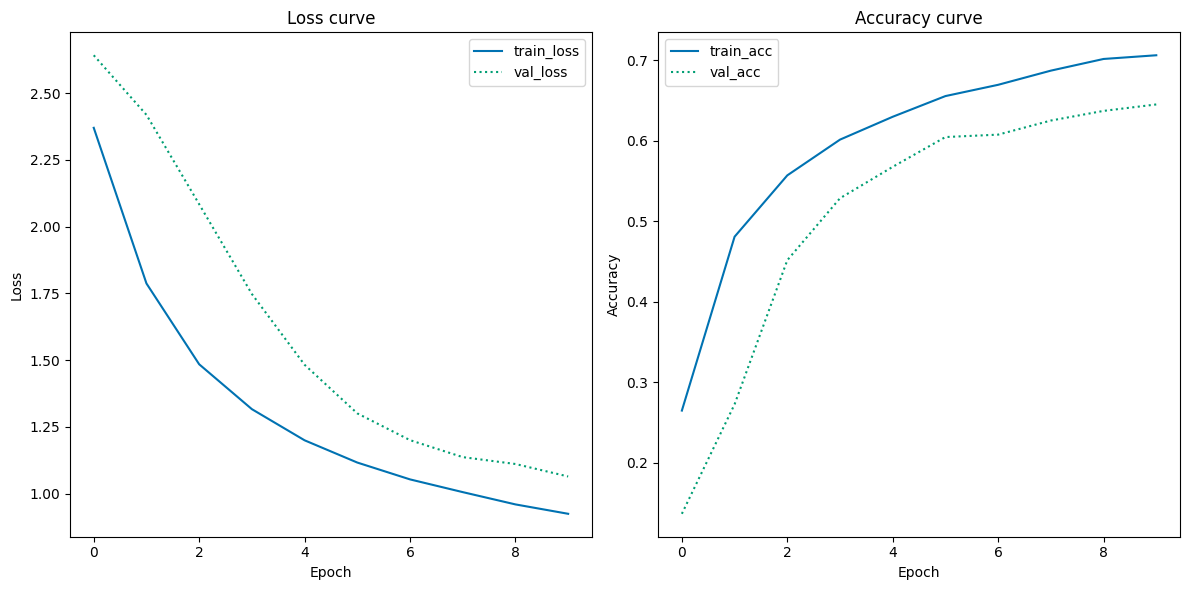

In [16]:
plot_history(H, 10) # Change to 10

In [17]:
predictions = model.predict(test_tf)


2023-04-21 23:00:02.092720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 206s 9s/step


TypeError: classification_report() missing 2 required positional arguments: 'y_true' and 'y_pred'